In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import geopandas as gpd

/Users/shudaosan/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [72]:
df = pd.read_csv('Amazon Customer Behavior Survey.csv')
df

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023/06/04 1:28:19 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care,Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023/06/04 2:30:44 PM GMT+5:30,23,Female,Once a month,Clothing and Fashion,Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023/06/04 5:04:56 PM GMT+5:30,24,Prefer not to say,Few times a month,Groceries and Gourmet Food;Clothing and Fashion,No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023/06/04 5:13:00 PM GMT+5:30,24,Female,Once a month,Beauty and Personal Care;Clothing and Fashion;...,Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023/06/04 5:28:06 PM GMT+5:30,22,Female,Less than once a month,Beauty and Personal Care;Clothing and Fashion,Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2023/06/12 4:02:02 PM GMT+5:30,23,Female,Once a week,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,4,...,Sometimes,Yes,Moderately,Sometimes,3,Sometimes,3,4,Competitive prices,Customer service responsiveness
598,2023/06/12 4:02:53 PM GMT+5:30,23,Female,Once a week,Clothing and Fashion,Sometimes,Few times a week,Filter,Multiple pages,3,...,Sometimes,Yes,Heavily,Sometimes,3,Sometimes,3,3,Product recommendations,Reducing packaging waste
599,2023/06/12 4:03:59 PM GMT+5:30,23,Female,Once a month,Beauty and Personal Care,Sometimes,Few times a week,categories,Multiple pages,3,...,Sometimes,Yes,Occasionally,Sometimes,3,Sometimes,2,3,Wide product selection,Product quality and accuracy
600,2023/06/12 9:57:20 PM GMT+5:30,23,Female,Few times a month,Beauty and Personal Care;Clothing and Fashion;...,Yes,Few times a month,Keyword,Multiple pages,1,...,Sometimes,No,Heavily,Yes,2,Yes,2,2,Wide product selection,Product quality and accuracy


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 23 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Timestamp                               602 non-null    object
 1   age                                     602 non-null    int64 
 2   Gender                                  602 non-null    object
 3   Purchase_Frequency                      602 non-null    object
 4   Purchase_Categories                     602 non-null    object
 5   Personalized_Recommendation_Frequency   602 non-null    object
 6   Browsing_Frequency                      602 non-null    object
 7   Product_Search_Method                   600 non-null    object
 8   Search_Result_Exploration               602 non-null    object
 9   Customer_Reviews_Importance             602 non-null    int64 
 10  Add_to_Cart_Browsing                    602 non-null    object
 11  Cart_C

In [74]:
df.describe()

,age,Customer_Reviews_Importance,Personalized_Recommendation_Frequency,Rating_Accuracy,Shopping_Satisfaction
count,602.000000,602.000000,602.000000,602.000000,602.000000
mean,30.790698,2.480066,2.699336,2.672757,2.463455
std,10.193276,1.185226,1.042028,0.899744,1.012152
min,3.000000,1.000000,1.000000,1.000000,1.000000
25%,23.000000,1.000000,2.000000,2.000000,2.000000
50%,26.000000,3.000000,3.000000,3.000000,2.000000
75%,36.000000,3.000000,3.000000,3.000000,3.000000
max,67.000000,5.000000,5.000000,5.000000,5.000000


In [75]:
date_columns = ["Timestamp"]
for col in date_columns:
    df[col] = pd.to_datetime(df[col])

/var/folders/pk/dwzb6yd54dl6f29180d633500000gn/T/ipykernel_29273/539987738.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[col] = pd.to_datetime(df[col])


In [76]:
df.fillna("Unknown",inplace=True)

In [77]:
df["Purchase_Categories"]=df["Purchase_Categories"].str.split(';')
df_expanded = df.explode("Purchase_Categories")

In [78]:
df.head()

,Timestamp,age,Gender,Purchase_Frequency,Purchase_Categories,Personalized_Recommendation_Frequency,Browsing_Frequency,Product_Search_Method,Search_Result_Exploration,Customer_Reviews_Importance,...,Saveforlater_Frequency,Review_Left,Review_Reliability,Review_Helpfulness,Personalized_Recommendation_Frequency,Recommendation_Helpfulness,Rating_Accuracy,Shopping_Satisfaction,Service_Appreciation,Improvement_Areas
0,2023-06-04 13:28:19-05:30,23,Female,Few times a month,[Beauty and Personal Care],Yes,Few times a week,Keyword,Multiple pages,1,...,Sometimes,Yes,Occasionally,Yes,2,Yes,1,1,Competitive prices,Reducing packaging waste
1,2023-06-04 14:30:44-05:30,23,Female,Once a month,[Clothing and Fashion],Yes,Few times a month,Keyword,Multiple pages,1,...,Rarely,No,Heavily,Yes,2,Sometimes,3,2,Wide product selection,Reducing packaging waste
2,2023-06-04 17:04:56-05:30,24,Prefer not to say,Few times a month,"[Groceries and Gourmet Food, Clothing and Fash...",No,Few times a month,Keyword,Multiple pages,2,...,Rarely,No,Occasionally,No,4,No,3,3,Competitive prices,Product quality and accuracy
3,2023-06-04 17:13:00-05:30,24,Female,Once a month,"[Beauty and Personal Care, Clothing and Fashio...",Sometimes,Few times a month,Keyword,First page,5,...,Sometimes,Yes,Heavily,Yes,3,Sometimes,3,4,Competitive prices,Product quality and accuracy
4,2023-06-04 17:28:06-05:30,22,Female,Less than once a month,"[Beauty and Personal Care, Clothing and Fashion]",Yes,Few times a month,Filter,Multiple pages,1,...,Rarely,No,Heavily,Yes,4,Yes,2,2,Competitive prices,Product quality and accuracy


/Users/shudaosan/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


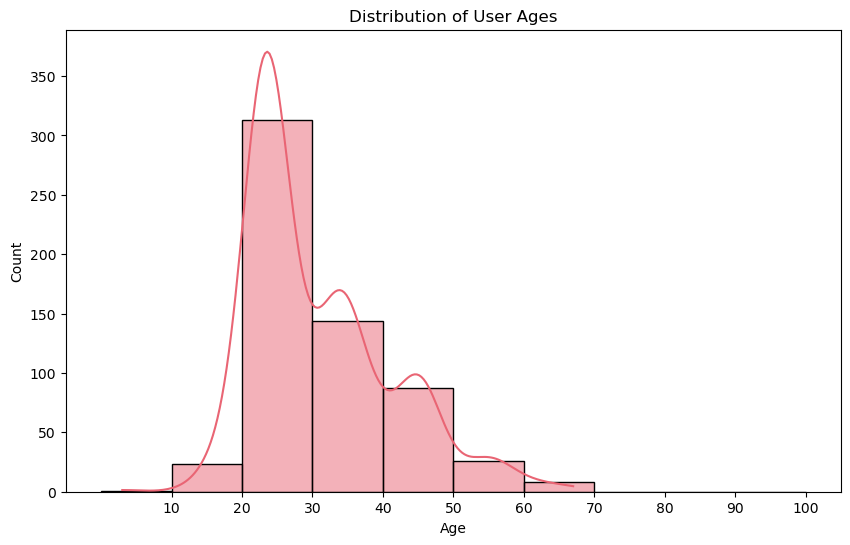

In [82]:
plt.figure(figsize=(10,6))
bins=[0,10,20,30,40,50,60,70,80,90,100]
sns.histplot(df["age"],bins=bins,kde=True,color="#E96574")
plt.title("Distribution of User Ages")
plt.xlabel("Age")
plt.xticks(age_bins)
plt.show()

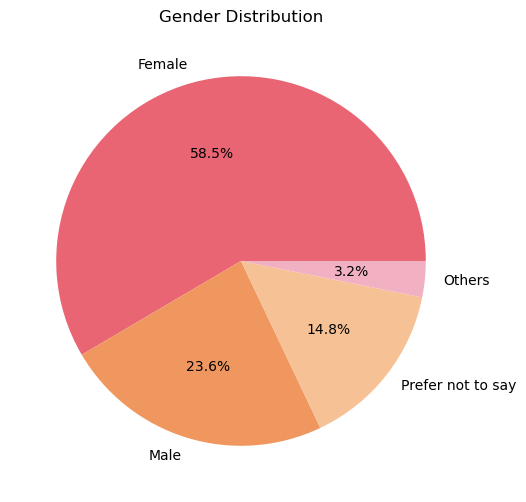

In [80]:
gender_counts = df['Gender'].value_counts()
colors = ['#E96574','#F0975F','#F6C195','#F2B1C3']
labels = gender_counts.index

plt.figure(figsize=(10,6))
plt.pie(gender_counts,labels=labels,colors=colors,autopct='%1.1f%%')
plt.title("Gender Distribution")
plt.show()

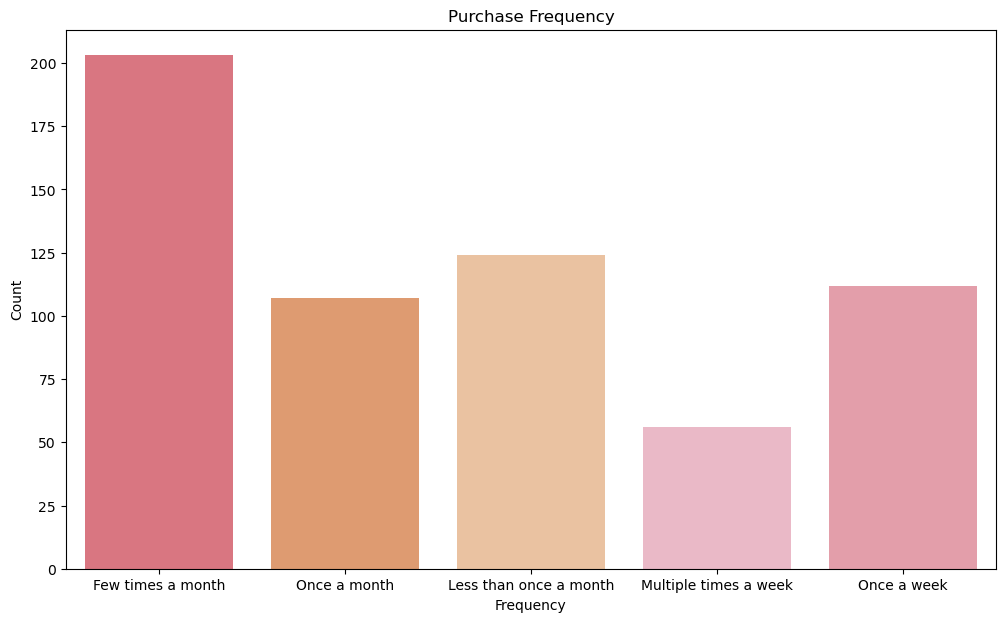

In [81]:
colors = ['#E96574','#F0975F','#F6C195','#F2B1C3','#EE92A2']
plt.figure(figsize=(12,7))
sns.countplot(data=df,x="Purchase_Frequency",palette=colors)
plt.title("Purchase Frequency")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

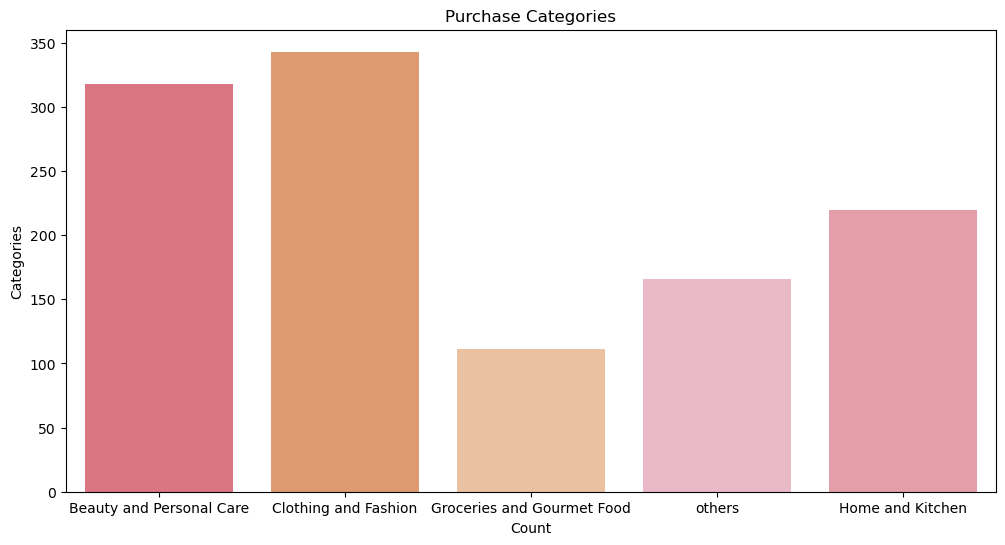

In [16]:
plt.figure(figsize=(12,6))
sns.countplot(x="Purchase_Categories",data=df_expanded,palette=['#E96574','#F0975F','#F6C195','#F2B1C3','#EE92A2'])
plt.title("Purchase Categories")
plt.xlabel("Count")
plt.ylabel("Categories")
plt.xticks(rotation=0)
plt.show()

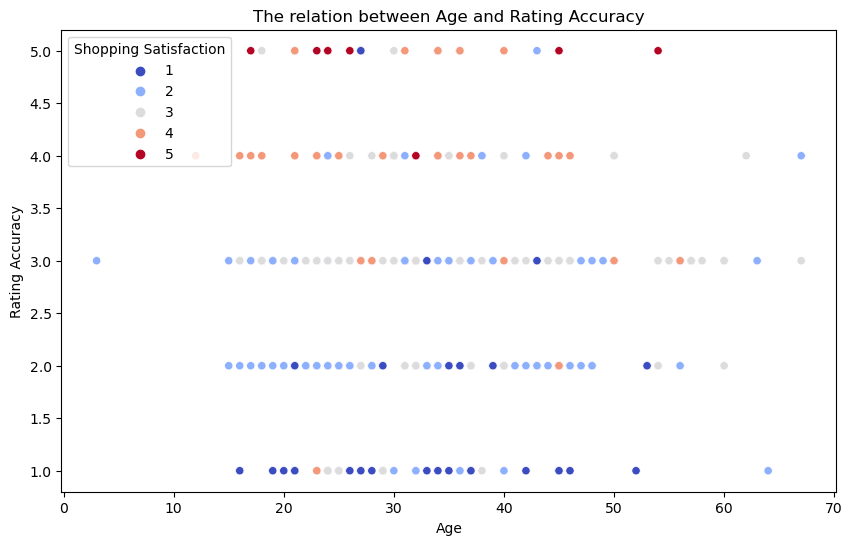

In [31]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df,x="age",y="Rating_Accuracy ",hue="Shopping_Satisfaction",palette="coolwarm")
plt.title("The relation between Age and Rating Accuracy")
plt.xlabel("Age")
plt.ylabel("Rating Accuracy")
plt.legend(title="Shopping Satisfaction")
plt.xticks(rotation=0)
plt.show()

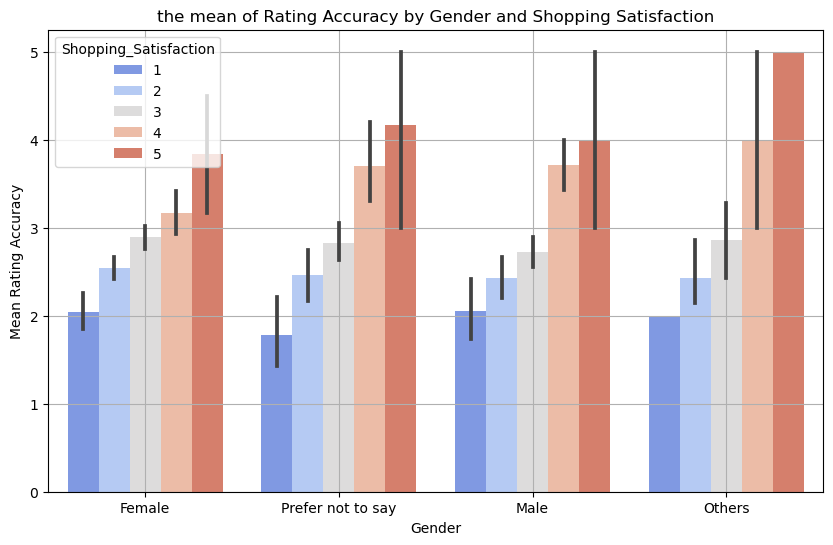

In [83]:
plt.figure(figsize=(10,6))
sns.barplot(data=df,x="Gender",y="Rating_Accuracy ",hue="Shopping_Satisfaction",palette="coolwarm")
plt.title("the mean of Rating Accuracy by Gender and Shopping Satisfaction")
plt.xlabel("Gender")
plt.ylabel("Mean Rating Accuracy")
plt.grid(True)
plt.show()

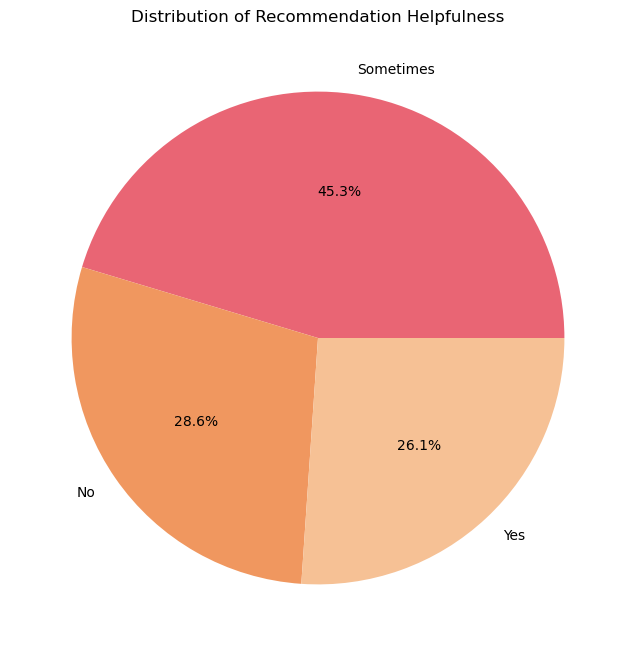

In [46]:
RH_counts = df["Recommendation_Helpfulness"].value_counts()
colors = ['#E96574','#F0975F','#F6C195']
plt.figure(figsize=(8,8))
plt.pie(RH_counts,labels=RH_counts.index,autopct="%1.1f%%",colors=colors)
plt.title("Distribution of Recommendation Helpfulness")
plt.show()

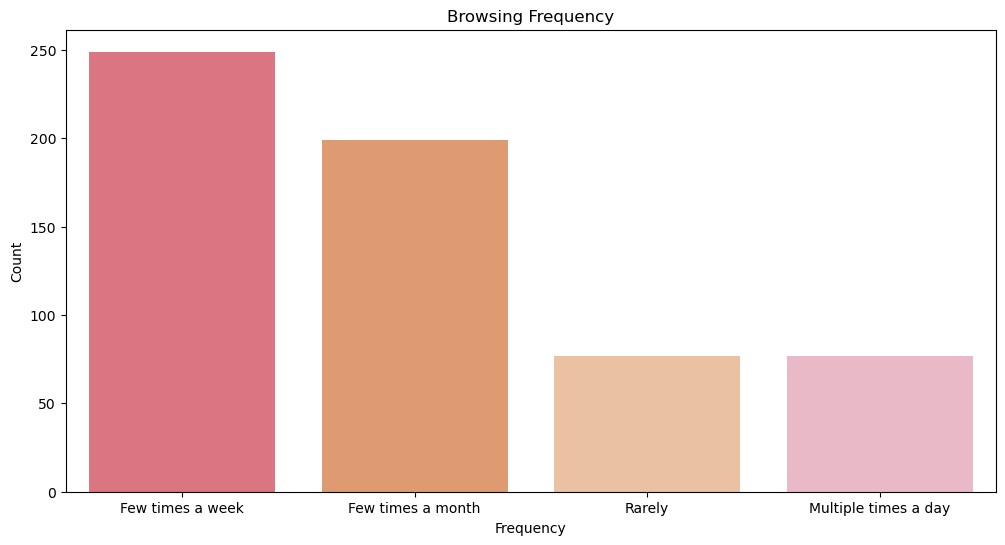

In [49]:
plt.figure(figsize=(12,6))
sns.countplot(data=df,x="Browsing_Frequency",palette=['#E96574','#F0975F','#F6C195','#F2B1C3','#EE92A2'])
plt.title("Browsing Frequency")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

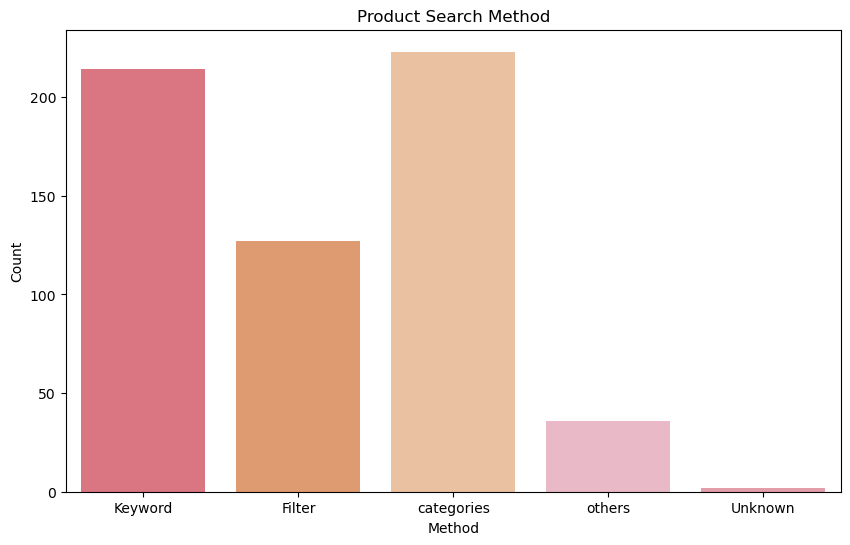

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="Product_Search_Method",palette=['#E96574','#F0975F','#F6C195','#F2B1C3','#EE92A2'])
plt.title("Product Search Method")
plt.xlabel("Method")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

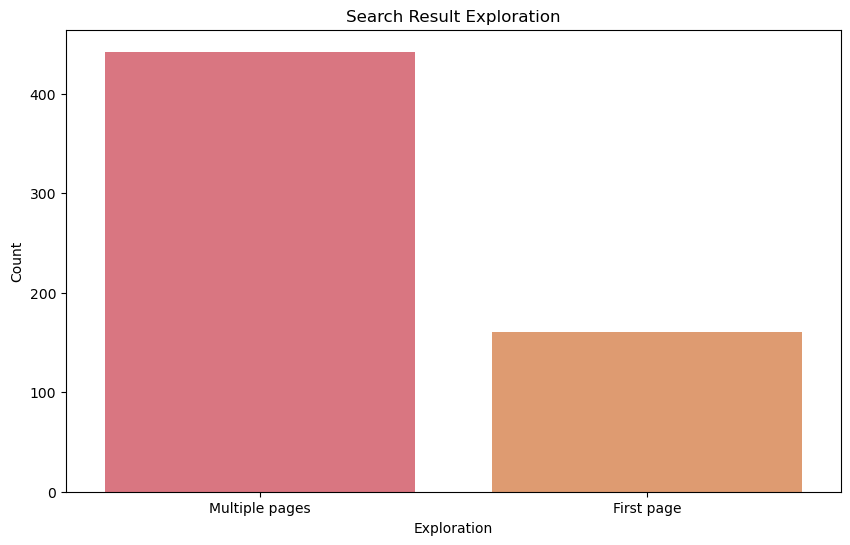

In [53]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="Search_Result_Exploration",palette=['#E96574','#F0975F'])
plt.title("Search Result Exploration")
plt.xlabel("Exploration")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

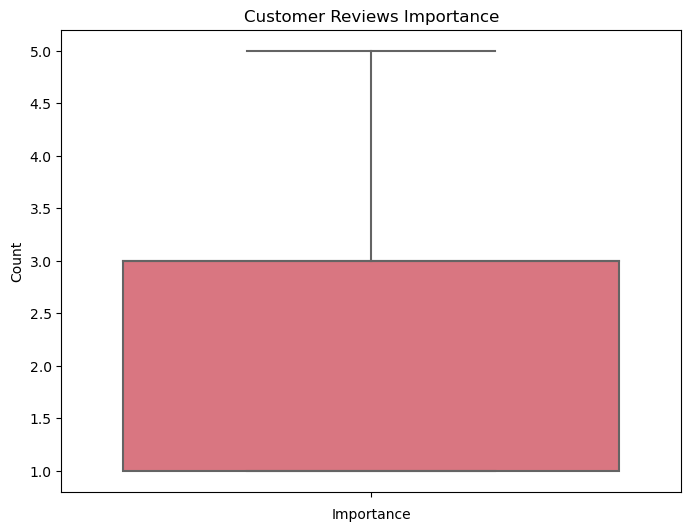

3.0
1


In [88]:
plt.figure(figsize=(8,6))
sns.boxplot(data=df,y="Customer_Reviews_Importance",palette=['#E96574'])
plt.title("Customer Reviews Importance")
plt.xlabel("Importance")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()
print(df.Customer_Reviews_Importance.median())
print(df.Customer_Reviews_Importance.min())

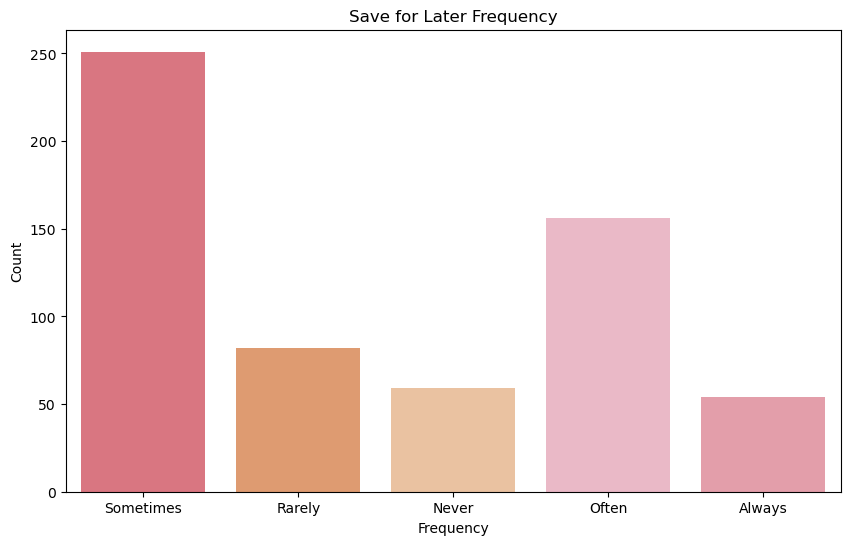

In [64]:
plt.figure(figsize=(10,6))
sns.countplot(data=df,x="Saveforlater_Frequency",palette=['#E96574','#F0975F','#F6C195','#F2B1C3','#EE92A2'])
plt.title("Save for Later Frequency")
plt.xlabel("Frequency")
plt.ylabel("Count")
plt.xticks(rotation=0)
plt.show()

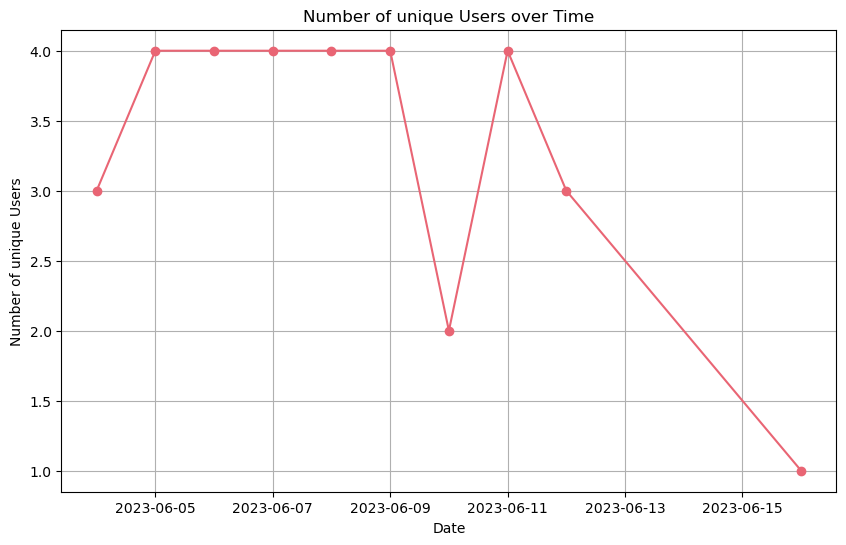

In [89]:
df["Date"]=df["Timestamp"].dt.date
user_counts=df.groupby("Date")["Gender"].nunique()
plt.figure(figsize=(10,6))
plt.plot(user_counts.index,user_counts.values,marker='o',linestyle='-',color='#E96574')
plt.title("Number of unique Users over Time")
plt.xlabel("Date")
plt.ylabel("Number of unique Users")
plt.xticks(rotation=0)
plt.grid(True)
plt.show()